# Kaggle Titanic Survivor Prediction

# 1. Define Problem

Type:<br>
Classification: Yes<br>
Regression: No

Can we predict if a passenger on the Titanic survived or died based on the provided data

# 2. Initial Setup

## Import Libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 3. Gather Data

Data is already provided for us in 2 .csv files downloaded from Kaggle

# 4. Load Data

Per the Kaggle instructions for the Titanic competition, I'll create 2 dataframes

In [2]:
#load both dataframes
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
#verify data loaded
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 5. Get Fammiliar with Data

In [4]:
#view size
print(f'Training dataset: {train_df.shape}')
print(f'Test dataset: {test_df.shape}')

Training dataset: (891, 12)
Test dataset: (418, 11)


In [5]:
#view basic info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Cabin have a lot of missing values

In [6]:
#get basic stats
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#view number of unique data values for each column
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# 6. Cleaning

Normally datasets are not already split between train and test<br>
I will clean the data on a combined dataset, but first I'll do some preliminary EDA on the train dataset

# 7. Preliminary Exploratory Data Analysis

I'll break out the train dataset into numeric and categorical subsets first

In [8]:
#create subset of quantatative variables
train_df_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
train_df_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [9]:
#check columns List
train_df_num.columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
#create subset of categorical variables
train_df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]
train_df_cat.head()

,Survived,Pclass,Sex,Cabin,Embarked
0,0,3,male,NaN,S
1,1,1,female,C85,C
2,1,3,female,NaN,S
3,1,1,female,C123,S
4,0,3,male,NaN,S


In [11]:
#check columns List
train_df_cat.columns

Index(['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked'], dtype='object')

With our columns in separate dataframes, we can take a quick look at distributions

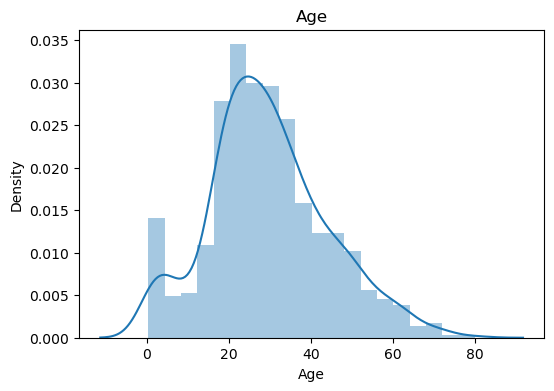

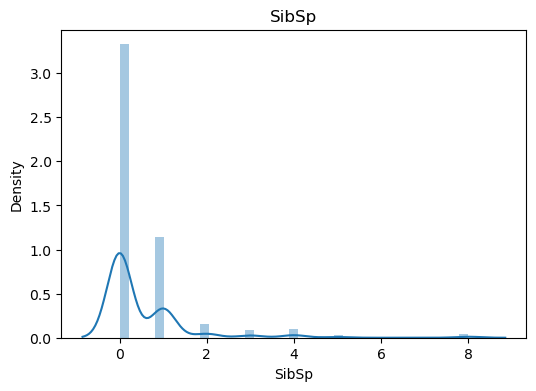

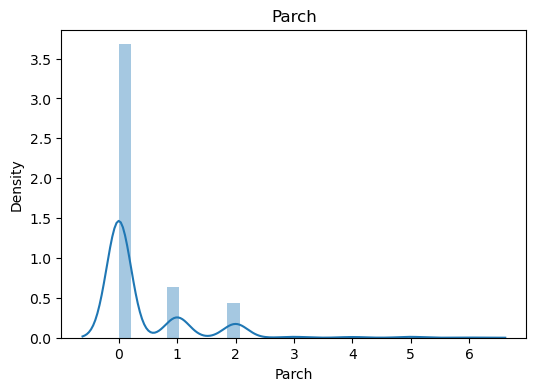

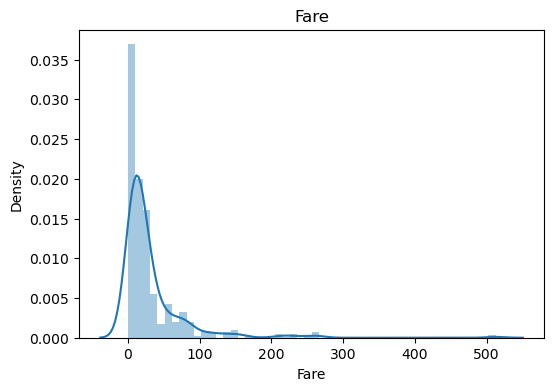

In [12]:
#view distributions for numeric columns
for col in train_df_num.columns:
    plt.figure(figsize=(6, 4))
    sns.distplot(train_df_num[col])
    plt.title(col)
    plt.show()
    print('')

Age looks fairly normalized and I'll leave as is<br>
Siblings and Parents are so small in volume on the outer edges, so I will leave those as is for now too<br>
On the hand, Fare should be normalized

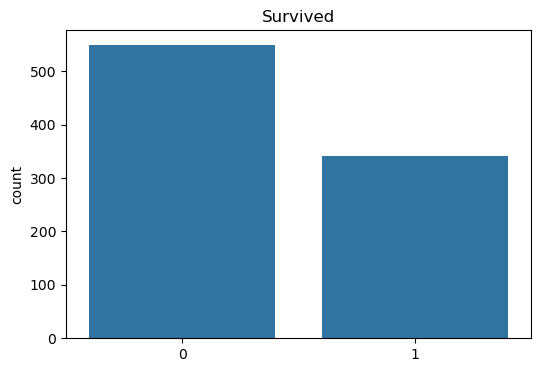

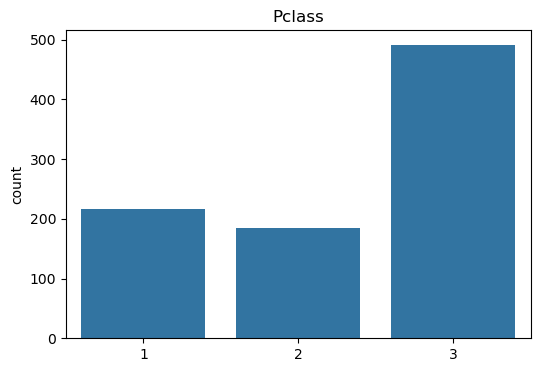

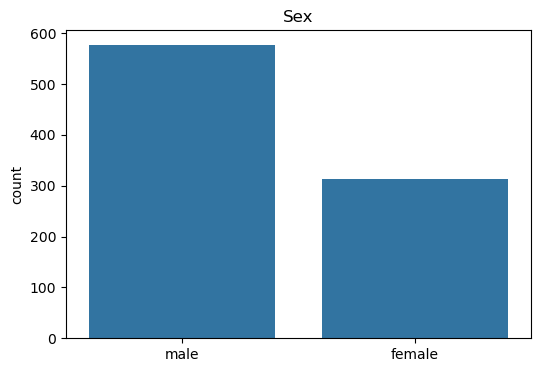

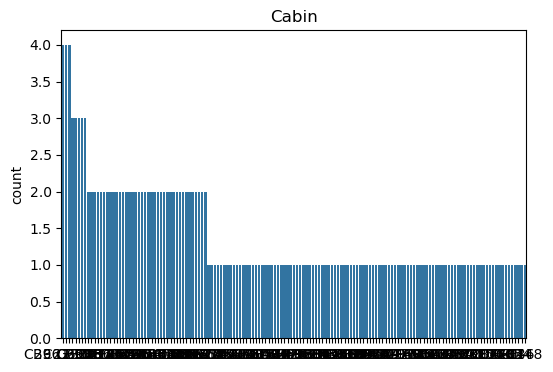

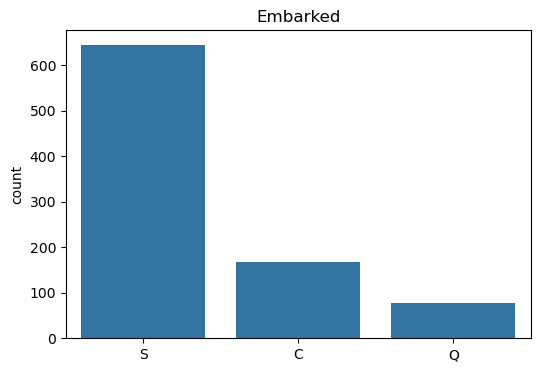

In [13]:
#view distributions for category columns
for col in train_df_cat.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(train_df_cat[col].value_counts()).set_title(col)
    plt.xlabel('')
    plt.title(col)
    plt.show()
    print('')

We have more deaths than survivors<br>
Majority of passengers are 3rd class, so we would expect there to be more 3rd class deaths by sheer numbers<br>
There are more males than females, so we should also expect more male deaths as well, for no other reason than there are more males<br>
Cabin is a column I'll most likely drop<br>
And most passengers embarked from one location, I most likely will drop that column as well

Of course, there are other reasons 3rd class may have disproportionate deaths along with other reasons we'd see the same in Sex, but we'll look into that later  

The below has no bearing on survivorship, but I'm curious to what the average Fare is for each Class

In [14]:
#view average cost of tickets by Class
train_df.groupby('Pclass')[['Fare']].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


We'll look more into if Age, Fare, Class, Siblins, and Parents impacted survivorship

In [15]:
#view average stats for survived/died
train_df.groupby('Survived')[['Age','Fare','Pclass','SibSp', 'Parch']].mean()

,Age,Fare,Pclass,SibSp,Parch
Survived,,,,,
0,30.626179,22.117887,2.531876,0.553734,0.329690
1,28.343690,48.395408,1.950292,0.473684,0.464912


Age is pretty even, however it appears if you paid more for a ticket, and therefore were of a higher Class, you had a better chance of surviving<br>
This isn't all that surprising for the Titanic<br>
If you didn't have siblings, you had a better chance to survive<br>
If you had parents, you also had a better chance to survive

Looking deeper into Age

In [16]:
#subset main df for survivors
survived_df = train_df.loc[train_df['Survived'] == 1]

#subset Age only
survived_df = survived_df[['Age']]

#count survivors by age
surv = survived_df.groupby('Age').value_counts()

In [17]:
#do the same for died as we did for survivors
died_df = train_df.loc[train_df['Survived'] == 0]
died_df = died_df[['Age']]
die = died_df.groupby('Age').value_counts()

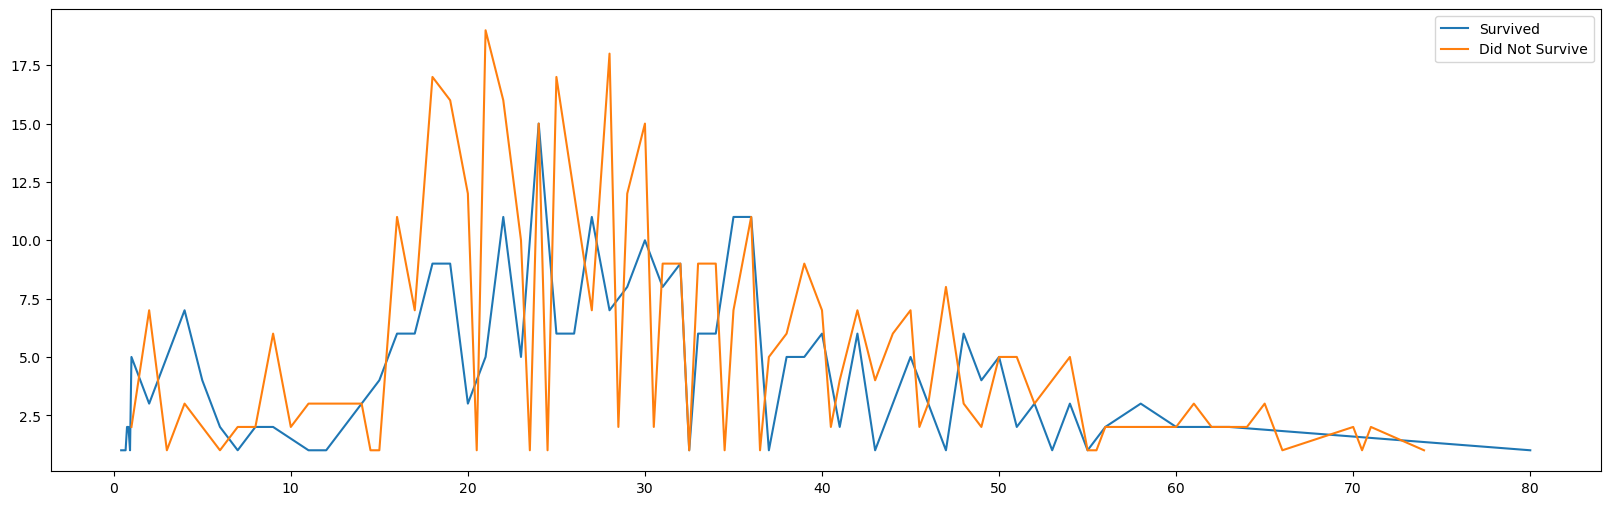

In [18]:
#plot count of survivors/deaths per age

#set figure size
plt.figure(figsize=(20, 6))

#set plot
plt.plot(surv.index, surv.values, label='Survived')
plt.plot(die.index, die.values, label='Did Not Survive')

#set plot attributes
plt.legend()

plt.show()

Age doesn't seem to have a huge impact on survival chance. This leads me to think the ages of passengers are spred out pretty evenly across Class and Fare<br>
I'll look closer into Age over Class to see if it proves out

In [19]:
#create subset dataframe of class and age
class_age = train_df[['Pclass', 'Age']].dropna(subset=['Age'])
class_age

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
885,3,39.0
886,2,27.0
887,1,19.0
889,1,26.0


In [20]:
#create List to iterate over for plots
classes = sorted(class_age['Pclass'].unique())
classes

[1, 2, 3]

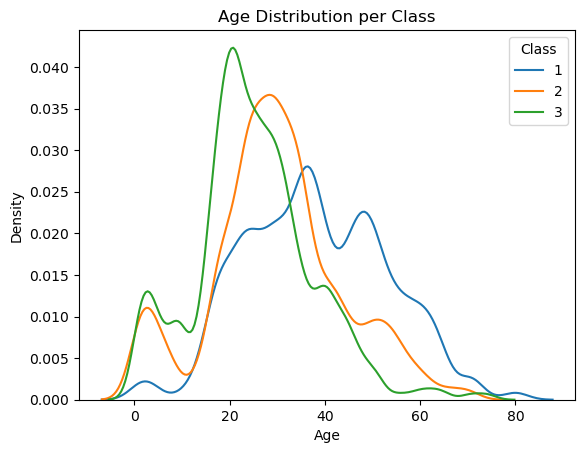

In [21]:
#loop over each class, plotting age
for pclass in classes:
    class_age_plot = class_age[class_age['Pclass'] == pclass]['Age']
    sns.kdeplot(class_age_plot, label=(f'{pclass}'), bw_adjust=0.5)

#set plot attributes
plt.title('Age Distribution per Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Class')

plt.show()

We do see similar peaks and valleys and overall similar density for age across the classes.

Taking a closer look into survival outcome per Class distinction

In [22]:
#view survival outcome per Class
class_surv_df = train_df.pivot_table(index='Survived', columns='Pclass', values='PassengerId', aggfunc='count')
class_surv_df

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
#create a dataframe of our pivot
data = {'1st_class':[80, 136], '2nd_class':[97, 87], '3rd_class':[372, 119]}
index = ['did not survive', 'survived']
class_surv_df = pd.DataFrame(data, index=index)

class_surv_df

,1st_class,2nd_class,3rd_class
did not survive,80,97,372
survived,136,87,119


In [24]:
#calculate percentages
class_surv_percent_df = class_surv_df.apply(lambda x: (x / x.sum()) * 100, axis=0)
class_surv_percent_df

,1st_class,2nd_class,3rd_class
did not survive,37.037037,52.717391,75.763747
survived,62.962963,47.282609,24.236253


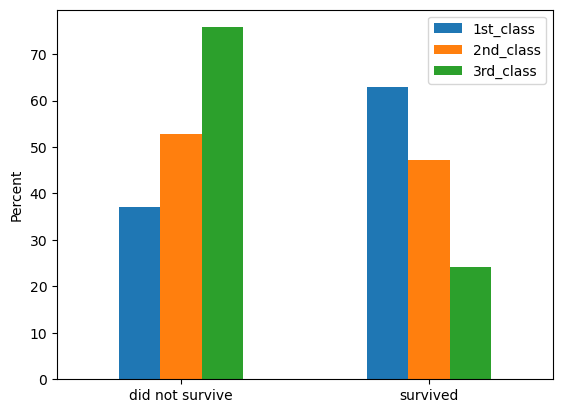

In [25]:
#view quick plot
class_surv_percent_df.plot.bar(rot=0, ylabel='Percent')

plt.show()

Though we should see more 3rd class deaths due to pure volume, the percentages should be equal (if all things in life were equal)<br>
However, we see the higher your Class, the better chance you have at surviving

We will do the same for Sex

In [26]:
#view survival outcome per Sex
sex_surv_df = train_df.pivot_table(index='Survived', columns='Sex', values='PassengerId', aggfunc='count')
sex_surv_df

Sex,female,male
Survived,,
0,81,468
1,233,109


In [27]:
#create a dataframe of our pivot
data = {'female':[81, 233], 'male':[468, 109]}
index = ['did not survive', 'survived']
sex_surv_df = pd.DataFrame(data, index=index)

sex_surv_df

,female,male
did not survive,81,468
survived,233,109


In [28]:
#calculate percentages
sex_surv_percent_df = sex_surv_df.apply(lambda x: (x / x.sum()) * 100, axis=0)
sex_surv_percent_df

,female,male
did not survive,25.796178,81.109185
survived,74.203822,18.890815


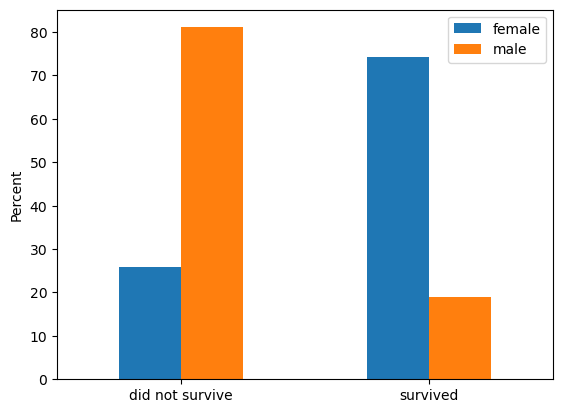

In [29]:
#view quick plot
sex_surv_percent_df.plot.bar(rot=0, ylabel='Percent')

plt.show()

As with Class, we would expect and do see more males dieing simply due to volume of men<br>
However, the percentages should be similar if all things were equal, but we can see the "Women and Children first" mantra of the time period<br>
And do see you had a much better chance at survival if you were female

We'll take a look at if having siblings or a spouse mattered.

In [30]:
#create dataframe subset
sibs_spouse = train_df[['Survived', 'SibSp']]
sibs_spouse.head()

,Survived,SibSp
0,0,1
1,1,1
2,1,0
3,1,1
4,0,0


In [31]:
#view values for number of siblings (or spouses)
sorted(sibs_spouse['SibSp'].unique())

[0, 1, 2, 3, 4, 5, 8]

In [32]:
#pulling passengers that have a sibline or a spouse (not solo traveler)
plus_one = sibs_spouse.loc[sibs_spouse['SibSp'] >= 1]['Survived']

#convert to dataframe
plus_one = pd.DataFrame(plus_one.value_counts())
plus_one

,count
Survived,
0,151
1,132


In [33]:
#add column for percent view
plus_one['percent_plus_one'] = (plus_one['count'] / plus_one['count'].sum())
plus_one

,count,percent_plus_one
Survived,,
0,151,0.533569
1,132,0.466431


In [34]:
#renaming count to be more specific since I plan to combine the dataframe to a similar solo dataframe
plus_one = plus_one.rename(columns={'count': 'count_plus_one'})
plus_one

,count_plus_one,percent_plus_one
Survived,,
0,151,0.533569
1,132,0.466431


Now I'll do the same for solo travelers

In [35]:
#create subset dataframe for solo travelers
solo = sibs_spouse.loc[sibs_spouse['SibSp'] < 1]['Survived']

#convert to dataframe
solo = pd.DataFrame(solo.value_counts())
solo

,count
Survived,
0,398
1,210


In [36]:
#add percent column
solo['percent_solo'] = (solo['count'] / solo['count'].sum())
solo

,count,percent_solo
Survived,,
0,398,0.654605
1,210,0.345395


In [37]:
solo = solo.rename(columns={'count': 'count_solo'})
solo

,count_solo,percent_solo
Survived,,
0,398,0.654605
1,210,0.345395


Now we'll combine the 2 dataframe, side by side

In [38]:
travelers = pd.concat([plus_one, solo], axis=1)
travelers

,count_plus_one,percent_plus_one,count_solo,percent_solo
Survived,,,,
0,151,0.533569,398,0.654605
1,132,0.466431,210,0.345395


In [39]:
#recreating the dataframe for plotting purposes
travel_plot = pd.DataFrame({
    'count_plus_one': [151, 132],
    'percent_plus_one': [0.533569, 0.466431],
    'count_solo': [398, 210],
    'percent_solo': [0.654605, 0.345395]
}, index=[0, 1])

travel_plot

,count_plus_one,percent_plus_one,count_solo,percent_solo
0,151,0.533569,398,0.654605
1,132,0.466431,210,0.345395


In [40]:
#transposing for plotting purposes
travel_plot = travel_plot[['percent_plus_one', 'percent_solo']].T
travel_plot

,0,1
percent_plus_one,0.533569,0.466431
percent_solo,0.654605,0.345395


<Axes: >

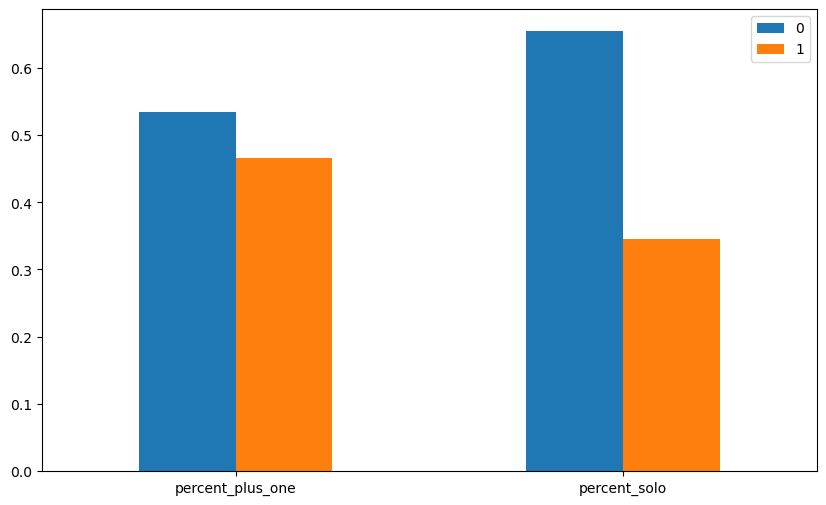

In [41]:
#plot
travel_plot.plot(kind='bar', figsize=(10, 6), rot=0)

We can see that if you had a sibling or a spouse, you had a better chance of survival

This completes some preliminary EDA as we have a good idea what needs to be done and learnings
- Normalize Fare
- Handle missing values
- Class, Sex, Fare have the most impact on survival
- Siblings and Parents have enough of an impact to include in modeling
- I'll drop Name, Cabin, Ticket, and Embark 

# 8. Cleaning / Preprocessing

We'll combine the datasets at this point and take care of null values and prepare the data for modeling

In [42]:
#combine dataframes
titanic_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#confirm we have 1309 rows
titanic_df.shape[0]

1309

Text(0.5, 1.0, 'Null Values')

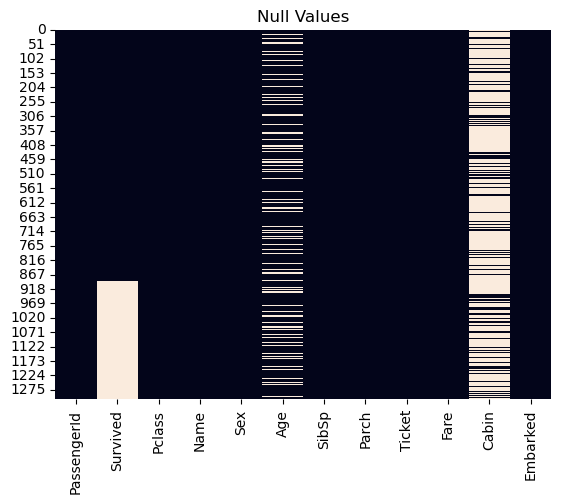

In [44]:
#view null values
sns.heatmap(titanic_df.isnull(), cbar=False).set_title('Null Values')

The block of Survived nulls is from the Test dataframe and that entire column can be ignored during this phase

In [45]:
#get count of nulls
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

We'll handle these in order and the first is Age<br>
We saw earlier that age is pretty evenly distributed, but children may make up most the missing ages<br>
If I strip the title from each name and see if any are missing, if so, my guess is those are children and not adults, then I'll take a look a the distribution of titles vs missing titles and fill ages accordingly

In [46]:
#get example of a name to figure out extraction code
titanic_df['Name'][0]

'Braund, Mr. Owen Harris'

In [47]:
#create Title column, I'll fill missing values with 'n/a' to avoid nulls
titanic_df['Title'] = titanic_df['Name'].str.extract(',\s(\w+\.)')

In [48]:
#view resulting titles
titanic_df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', nan,
       'Jonkheer.', 'Dona.'], dtype=object)

In [49]:
#count number of nan (nulls)
titanic_df['Title'].isnull().sum()

1

Well, that didn't pan out, there's only 1 missing value, which means all passengers, even babies, were given some sort of title<br>
For this reason, I'll simply fill missing age values with the mean

In [50]:
#get mean for Age column
mean_age = titanic_df['Age'].mean()
mean_age

29.881137667304014

In [51]:
#fill missing values
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [52]:
#confirm
titanic_df['Age'].isnull().sum()

0

We have 1 Fare that is missing, I'll use Mode to fill that value

In [53]:
#get mode of Fare
mode_fare = titanic_df['Fare'].mode()[0]
mode_fare

8.05

In [54]:
#fill missing value
titanic_df['Fare'] = titanic_df['Fare'].fillna(mode_fare)

In [55]:
#confirm
titanic_df['Fare'].isnull().sum()

0

Next is Cabin, there are so many and since this is a simple exploration, I will delete the column

In [56]:
#drop cabin
titanic_df = titanic_df.drop(columns=['Cabin'], axis=1)

In [57]:
#confirm
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

Finally, we will fill Embark using Mode as well

In [58]:
#get mode of Embarked
mode_embarked = titanic_df['Embarked'].mode()[0]
mode_embarked

'S'

In [59]:
#fill missing value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

In [60]:
#confirm all null values (except Survived) are handled
titanic_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            1
dtype: int64

Note, I will not include Title in the model, so I will ignore the missing value

### Next we'll normalilze any columns

The only column identified was Fare

In [61]:
#use numpy log1p to handle any 0 values and avoid errors
titanic_df['Fare_log'] = np.log1p(titanic_df['Fare'])

In [62]:
#view results
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,2.202765


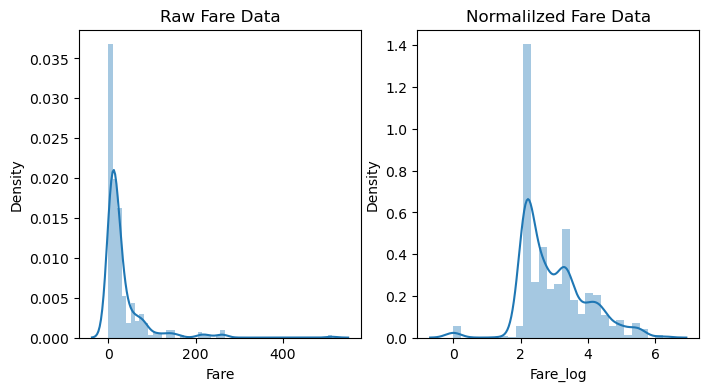

In [63]:
#view plot as well
#set plot layout
plt.figure(figsize=(8, 4))

#create plot 1
#set position and create plot 1
plt.subplot(1, 2, 1)
sns.distplot(titanic_df['Fare'])
plt.title('Raw Fare Data')

#set position and create plot 2
plt.subplot(1, 2, 2)
sns.distplot(titanic_df['Fare_log'])
plt.title('Normalilzed Fare Data')

# Show the plots
plt.show()


# 9. Features Engineering

We'll now prepare the cleaned and preprocessed dataset for modeling

We need to create the features dataframe first

In [64]:
#view current dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_log
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,2.202765


In [65]:
#view dataframe columns
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Fare_log'],
      dtype='object')

We'll grab the featurs we want for our model<br>
NOTE: Since we're not using scikit-learn to train/test split, I need to match the original train/test csv files that Kaggle provided<br>
So, I'm adding PassengerId and Survived to the features below

In [66]:
#create list of features we'll use
features_list = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare_log']

In [67]:
#create features dataframe
features = titanic_df[features_list]

In [68]:
features.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,1,0.0,3,male,22.0,1,0,S,2.110213
1,2,1.0,1,female,38.0,1,0,C,4.280593
2,3,1.0,3,female,26.0,0,0,S,2.188856
3,4,1.0,1,female,35.0,1,0,S,3.990834
4,5,0.0,3,male,35.0,0,0,S,2.202765


We'll need to fit_transform Sex and one hot encode for categorical variables (Pclass, SibSp, Parch, Embarked)

In [69]:
#transform Sex
features['Sex'] = LabelEncoder().fit_transform(features['Sex'])

In [70]:
#confirm
features.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,1,0.0,3,1,22.0,1,0,S,2.110213
1,2,1.0,1,0,38.0,1,0,C,4.280593
2,3,1.0,3,0,26.0,0,0,S,2.188856
3,4,1.0,1,0,35.0,1,0,S,3.990834
4,5,0.0,3,1,35.0,0,0,S,2.202765


In [71]:
#use get dummies for categorical variables
features_one_hot = pd.get_dummies(data=features, columns=['Pclass', 'SibSp', 'Parch', 'Embarked'])

In [72]:
#confirm
features_one_hot.head()

,PassengerId,Survived,Sex,Age,Fare_log,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,1,22.0,2.110213,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,4.280593,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,2.188856,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,3.990834,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,1,35.0,2.202765,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True


In [73]:
#convert entire df to float
features_one_hot = features_one_hot.astype(float)

In [74]:
#confirm
features_one_hot.head()

,PassengerId,Survived,Sex,Age,Fare_log,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,1.0,22.0,2.110213,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,0.0,38.0,4.280593,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,0.0,26.0,2.188856,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,0.0,35.0,3.990834,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,1.0,35.0,2.202765,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Saving file before modeling

I'm going to save the combined dataset to file before we split it back to Kaggle's train and test files<br>
Which we need to do for 1) to test models and 2) submit our predictions based on the best performing model

In [194]:
features_one_hot.to_csv('data/titanic_combined_dataset_cleaned_processed.csv', index=False)

# 10. Model Prep part 1 (Re-Creating Kaggle's Train/Test Datasets)

Normally, X (features) and Y (target) datasets are created for testing models by doing our own split<br>
But Kaggle already provided the split datasets that we'll need to use in submitting a prediction<br>
However, we did analysis on the combined dataset<br>
So, I will take what we've done and recreate the train/test files that Kaggle provided<br>

Load data if not already loaded

In [195]:
#if not already loaded, uncomment below
#features_one_hot = pd.read_csv('data/titanic_combined_dataset_cleaned_processed.csv')

In [77]:
#train_rows = len(train_df)
train_rows = train_df.shape[0]
train_rows

891

Re-Create Kaggle train dataset

In [78]:
#create training dataset 
train = features_one_hot.iloc[:train_rows, :]

In [79]:
#confirm (should be 891 rows)
train.shape

(891, 26)

Re-Create Kaggle test dataset

In [80]:
#create test dataset
test = features_one_hot.iloc[train_rows:, :]

In [81]:
#confirm (should be 418 rows)
test.shape

(418, 26)

I want to save the cleaned/processed train and test datasets to file for possible later use after

In [192]:
#save train to file
train.to_csv('data/train.cleaned.csv', index=False)

In [193]:
#save test to file
test.to_csv('data/test.cleaned.csv', index=False)

# 11. Model Prep part 2 (Setting Up for Model Testing)

Create X (features) and y (target) dataframes<br>
Reminder: this is done using the train dataset only, not the combined dataset<br>

In [196]:
#create features dataframe and target dataframe
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

First, I will perform some processing of the dataframes before we split<br>

In [89]:
#convert target to array
y = y.to_numpy()

In [90]:
#view partial results
y[:50]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

In [91]:
#standardize the X data
transform = preprocessing.StandardScaler()
#standardize features
X = transform.fit_transform(X)

In [92]:
#view partial results
X[:3]

array([[ 0.73769513, -0.59525389, -0.87974057, -0.56568542, -0.51015154,
         0.90258736, -1.46574551,  1.80642129, -0.18012484, -0.13522468,
        -0.14359163, -0.07512217, -0.08898625,  0.56049915, -0.39070706,
        -0.31407587, -0.07512217, -0.06715343, -0.07512217, -0.03352008,
         0.        , -0.48204268, -0.30756234,  0.61583843],
       [-1.35557354,  0.6359965 ,  1.36121993,  1.76776695, -0.51015154,
        -1.10792599, -1.46574551,  1.80642129, -0.18012484, -0.13522468,
        -0.14359163, -0.07512217, -0.08898625,  0.56049915, -0.39070706,
        -0.31407587, -0.07512217, -0.06715343, -0.07512217, -0.03352008,
         0.        ,  2.0745051 , -0.30756234, -1.62380254],
       [-1.35557354, -0.28744129, -0.79853997, -0.56568542, -0.51015154,
         0.90258736,  0.68224668, -0.55358072, -0.18012484, -0.13522468,
        -0.14359163, -0.07512217, -0.08898625,  0.56049915, -0.39070706,
        -0.31407587, -0.07512217, -0.06715343, -0.07512217, -0.03352008,
  

Now we can split the data

In [93]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [94]:
#view results
print(f'Train set | X:{X_train.shape} Y:{y_train.shape}')
print('')
print(f'Test set | X:{X_test.shape} Y:{y_test.shape}')

Train set | X:(712, 24) Y:(712,)

Test set | X:(179, 24) Y:(179,)


# 12. Model Testing

### Logistic Regression

#### This first model will be step by step explanation

In [95]:
#create model object
lr=LogisticRegression()
lr

LogisticRegression()

In [96]:
#train the model object 
lr.fit(X_train, y_train)

LogisticRegression()

In [97]:
#calculate the accuracy
lr_accuracy = lr.score(X_test, y_test)
print(f'The accuracy is: {lr_accuracy}')

The accuracy is: 0.8100558659217877


### Logistic Regression Cross Validation

Using cross validation to see if we can improve the score

In [160]:
#calculate cv score
lr_cv_score = cross_val_score(lr, X, y, cv=5)

#view scores and best score
print(lr_cv_score)
print(f'Best CV score: {np.max(lr_cv_score)}')

[0.80446927 0.80337079 0.79775281 0.80898876 0.80898876]
Best CV score: 0.8089887640449438


### Logistic Regression Grid Search

Using grid search to see if we can improve the cv score

In [147]:
#create model object
lr_grid=LogisticRegression()
lr_grid

LogisticRegression()

In [148]:
#create a range from c in parameters
c_range = np.arange(.01, 1, .01)

In [149]:
#loop through values of c
for c in c_range:
    logreg_cv = GridSearchCV(lr_grid, {'C':[c], 'penalty':['l2'], 'solver':['lbfgs']}, cv=5)
    logreg_cv.fit(X_train, y_train)

print('Process Complete')

Process Complete


In [150]:
print(f'Best parameters: {logreg_cv.best_params_}')
print(f'Best accuracy score for grid search: {logreg_cv.best_score_}')

Best parameters: {'C': 0.99, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy score for grid search: 0.8005614104205654


Interestingly, we see the R^2 score is better than cross validation<br>
Also, we see when gridsearch was used, we should have optimized on cross validation, but we did not 

In [164]:
#view all scores
print(f'Accuracy score: {lr_accuracy}')
print(f'Best CV score: {np.max(lr_cv_score)}')

Accuracy score: 0.8100558659217877
Best CV score: 0.8089887640449438


#### From here on out, I'll run through several models to find the best performing one
#### For these iterations, I won't use grid search

In [161]:
def model_tester(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    model.fit(X_train, y_train)
    print(f'The accuracy is: {model.score(X_test, y_test)}')

    cv_score = cross_val_score(model, X, y, cv=5)
    print(cv_score)
    print(f'Best CV score: {np.max(cv_score)}')

### Support Vector Machine (SVM)

In [162]:
#create model object
svm = SVC()

In [163]:
#test model
model_tester(svm)

The accuracy is: 0.7988826815642458
[0.80446927 0.79775281 0.80898876 0.79213483 0.8258427 ]
Best CV score: 0.8258426966292135


### Decision Tree

In [165]:
tree = DecisionTreeClassifier()

In [166]:
model_tester(tree)

The accuracy is: 0.7877094972067039
[0.75977654 0.75842697 0.79775281 0.74719101 0.80337079]
Best CV score: 0.8033707865168539


### K Nearest Neighbor (KNN)

In [167]:
KNN = KNeighborsClassifier()

In [168]:
model_tester(KNN)

The accuracy is: 0.8044692737430168
[0.72067039 0.75280899 0.83707865 0.81460674 0.78651685]
Best CV score: 0.8370786516853933


### Random Forest Classifier

In [170]:
forest = RandomForestClassifier()

In [171]:
model_tester(forest)

The accuracy is: 0.8212290502793296
[0.76536313 0.7752809  0.84831461 0.78089888 0.80898876]
Best CV score: 0.848314606741573


### Extra Trees Classifier

In [173]:
extra_trees = ExtraTreesClassifier()

In [174]:
model_tester(extra_trees)

The accuracy is: 0.8044692737430168
[0.72625698 0.76404494 0.83146067 0.76966292 0.78651685]
Best CV score: 0.8314606741573034


### XGB Classifier

In [178]:
xgb = XGBClassifier()

In [179]:
model_tester(xgb)

The accuracy is: 0.8324022346368715
[0.78212291 0.79213483 0.85393258 0.76966292 0.83146067]
Best CV score: 0.8539325842696629


### LGBM Classifier

In [181]:
lgbm = LGBMClassifier()

In [183]:
model_tester(lgbm)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### Cat Boost Classifier

In [187]:
cat = CatBoostClassifier(verbose=0)

In [188]:
model_tester(cat)

The accuracy is: 0.8100558659217877
[0.81564246 0.83146067 0.83146067 0.80337079 0.84269663]
Best CV score: 0.8426966292134831


#### That completes testing out several models

The best model was LGBM Classifer

# 13. Predictions

We'll use the LGBM Classifier<br>
We need to use the full data which is already ready for us in X and y

In [231]:
#create model object
best_model = LGBMClassifier()

In [232]:
#train model
best_model.fit(X, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

We need to make predictions for the 'Survived' column below

In [239]:
test.head()

,PassengerId,Survived,Sex,Age,Fare_log,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
891,892.0,NaN,1.0,34.5,2.178064,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
892,893.0,NaN,0.0,47.0,2.079442,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,894.0,NaN,1.0,62.0,2.369075,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
894,895.0,NaN,1.0,27.0,2.268252,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,896.0,NaN,0.0,22.0,2.586824,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We don't have X_test, so we'll create that using the test dataframe

In [235]:
#create X_test
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [236]:
#view dataframe
X_test.head()

,Sex,Age,Fare_log,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
891,1.0,34.5,2.178064,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
892,0.0,47.0,2.079442,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,1.0,62.0,2.369075,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
894,1.0,27.0,2.268252,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.0,22.0,2.586824,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [237]:
#make predictions
predictions = best_model.predict(X_test)

In [238]:
#view predictions
predictions

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

# 14. Submission

In [240]:
#create prediction dataframe
output = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions})
output.head()

,PassengerId,Survived
891,892.0,0.0
892,893.0,0.0
893,894.0,0.0
894,895.0,1.0
895,896.0,0.0


The submission values must be intergers

In [246]:
output = output.astype(int)

In [250]:
#save to submission file
output.to_csv('submission/submission.csv', index=False)